# Is employee churn really worth the worry?
Can you help reduce employee turnover?

## 💎Background
The board of Peacock Enterprise is worried about the relatively high turnover of their workers, and my team under the human capital department must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with recommendation on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

### Importing necessary libraries


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


### A quick glance

In [2]:
empchu = pd.read_csv('employee_churn_data.csv')
empchu.head()
#empchu.describe()
empchu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [3]:
#a bit of featuring
empchu['avg_hrs_day']= empchu['avg_hrs_month']/23
empchu['Reward']= np.where((empchu['promoted']==1) | (empchu['bonus']==1),"Rewarded","Not Rewarded")
empchu['Reward_num']= np.where((empchu['promoted']==1) | (empchu['bonus']==1),1,0)


array([[<AxesSubplot:title={'center':'promoted'}>,
        <AxesSubplot:title={'center':'review'}>,
        <AxesSubplot:title={'center':'projects'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'satisfaction'}>,
        <AxesSubplot:title={'center':'bonus'}>],
       [<AxesSubplot:title={'center':'avg_hrs_month'}>,
        <AxesSubplot:title={'center':'avg_hrs_day'}>,
        <AxesSubplot:title={'center':'Reward_num'}>]], dtype=object)

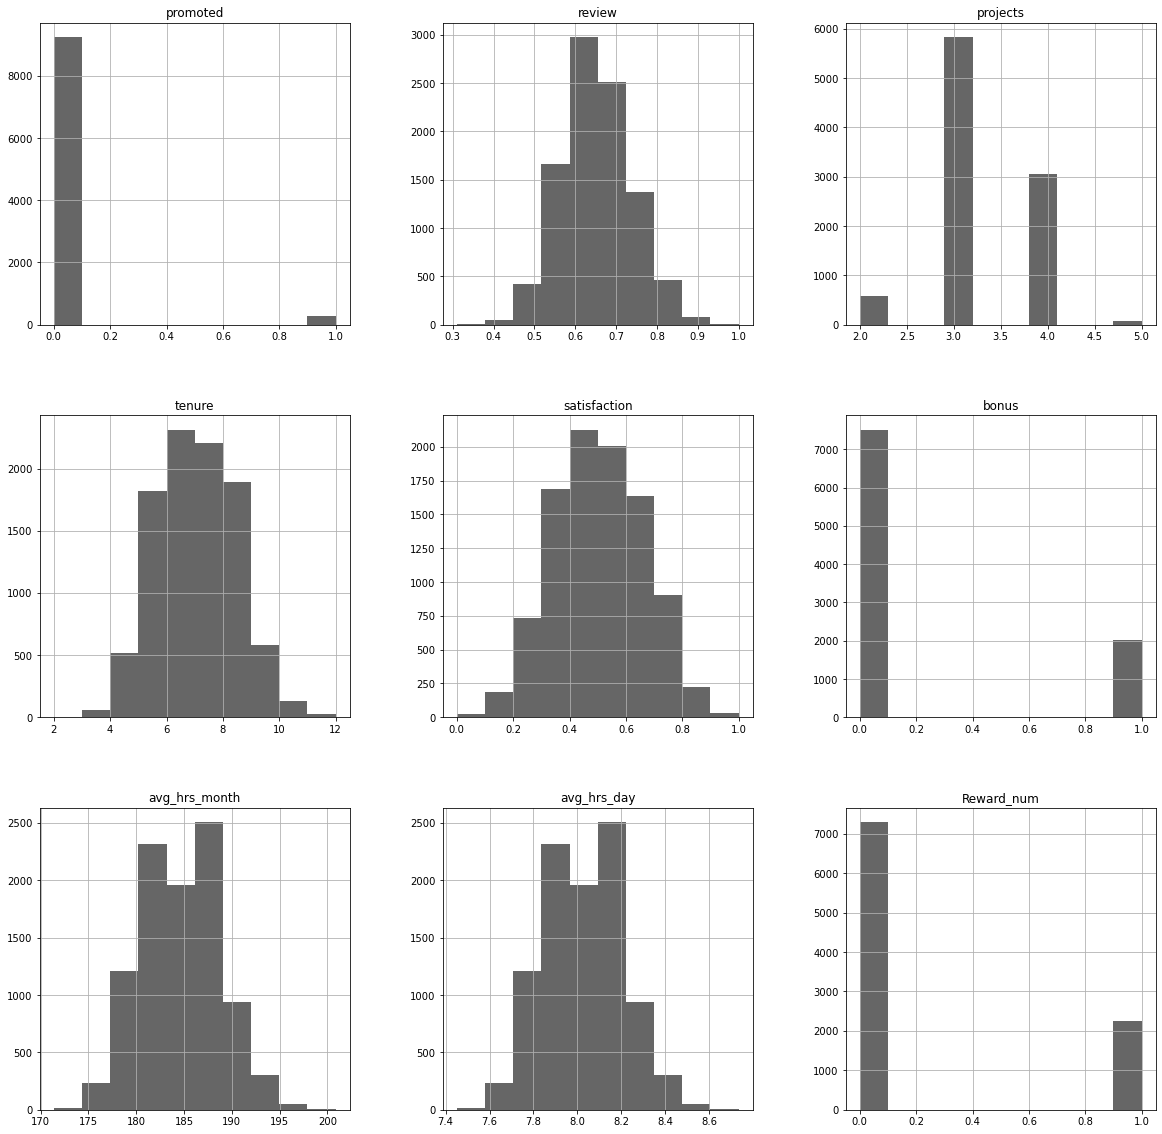

In [4]:
empchu.hist(figsize=(20,20),alpha=0.6,color='k')

## 🧑‍⚖️Insight and Reccomendation

|                           |                                                                      |
|:---------                 |:---------------------------------------------------------------------|
|  **Key Insights**          | <ul><li>Average review for each staff is 0.6.</li><li>Working time on a average per day is around 8:20mins.</li><li> 29% out of the almost 10,000 staff have left just in one year.</li><li> 89 more are likely to leave by the fulfillment of this data analysis.|                         
|                                                                      |
| **Key Reccommendations**  | <ul><li>All forms of reward (promotion, bonuses and salaries) rates should be increased.</li><li>Systems should be put in place to contain the new churn system, it has come to stay.For example, company culture should be well grounded on employee's first year and transferable by his or her third year.</li><li>More data should be collected to answer questions concerning recruitment, trainings and climbing the ranks.</li><li>Salaries should be in 5 categories instead of 3. Reason,it will enhance employee's motivation if they know they can earn above average easily and this may help them decide to stay.</li><li>8 hours everyday in an environment is fading out of the system as people do not have control of their time, people love the idea of flexible time. Focus should be on getting the job done and not necessarily staying at the office for 8 hours.</li><li>Loyalty and milestones should be greatly celebrated especially at the 5th year of service.</li><li>Organize regular training and development programs and introduce rewards to celebrate hard work like extra rest days, etc.</li><li>Create more hierachical divisions to encourage a good number of promotion vacancies|


## How costly can staff churning be?
The cost of employee turnover can be detrimental in many ways. Widely, it can cost 2 times the salary of the employee that left, company's culture, on-the-job experiences and knowledge taiored to that company that is should have been passed and even extensively when it involve a large number, affects productivity and quality which eventually tell on the company itself. 

#### *the company is facing a high churn rate and should not be left untreated*
Here, in the last 24 months, 29.2% of the entire staff left the company; that is 2785 of 9540. $(staffleft / totalstaff) *100)$ -being the overall churn rate.
#### *most staff leave between 5 to 8 years of work*
Staff that has stayed for atleast 5 years occupy a senior position and must have gotten a full grasp of what their job entails which contributes tremendously to their work output. This is the more reson why the company may face some imbalance and incure cost as these type of staff are difficult to replace. 
#### *a high percentage of those newly employed left the company*
Almost 70% of those employed within 2 years and above 50% of those employed in the last 3 years left the company. This is quite too early and suggest may suggest recruitment and onboarding problems.

In [5]:
#Percentage of employees that has left the company
empchu[empchu['left']=='yes'].count()
Percent_left= empchu[empchu['left']=='yes']
(Percent_left.left.count()/9540) *100


29.18238993710692

Text(0.5, 1.0, 'Number of employees (Present and Left)')

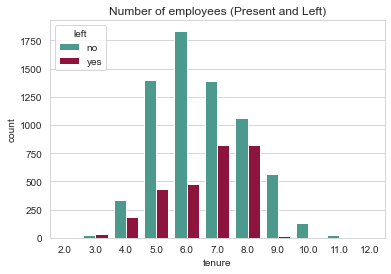

In [6]:
#employees thet has left or stayed and how long
sns.set_style("whitegrid")
churn_time= sns.countplot(x="tenure",data=empchu,hue="left",palette=['#3FA796','#A10035'])
churn_time.set_title('Number of employees (Present and Left)')


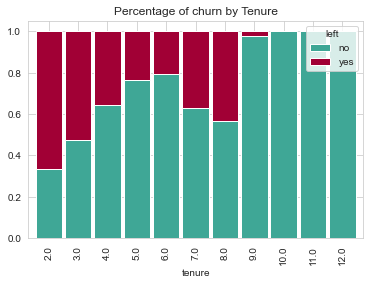

In [7]:
#percentage viz for employee churn
empchu.groupby('tenure')['left'].value_counts(normalize=True).unstack('left').plot.bar(stacked=True, color=['#3FA796','#A10035'],width= 0.9)
plt.title('Percentage of churn by Tenure')
plt.savefig('percentage of churn by tenure.jpeg')


#### Churn rate is similar across all departments
Looking at all the departments, they share almost the same churn percentages. This suggests that this problem is an organizational issue and most likely have generic causes in all the departments.Churn rates range from approximately 26.9% to  30.9%; the lowest coming from the finance department and the highest, IT department.
In addition, the density plot shown below further confirms that the most churning happens between 6 to 8 years of service regardless of which department they belong so much that the number of people leaving during that time exceeds the proportion of staff that continue to work.

In [8]:
#finding the percentage of those who left by their department

emp_chu_by_dept= empchu.groupby('department')[['left']].count()
left_yes= empchu[empchu['left']=='yes']
emp_chu_by_dept['dept_left_yes']= left_yes.groupby('department')[['left']].count()
emp_chu_by_dept['perc_left_yes']=(emp_chu_by_dept.dept_left_yes / emp_chu_by_dept.left) * 100
emp_chu_by_dept.rename(columns={'left':'total'},inplace= True)
emp_chu_by_dept.reset_index(inplace=True)
emp_chu_by_dept.sort_values('perc_left_yes',ascending=False,inplace=True)
emp_chu_by_dept

,department,total,dept_left_yes,perc_left_yes
0,IT,356,110,30.898876
4,logistics,360,111,30.833333
7,retail,1541,471,30.564568
5,marketing,802,243,30.299252
9,support,735,212,28.843537
2,engineering,1516,437,28.825858
6,operations,1522,436,28.646518
8,sales,1883,537,28.518322
1,admin,423,119,28.132388
3,finance,402,108,26.865672


Text(0.5, 1.0, 'Percentage of churn by Department')

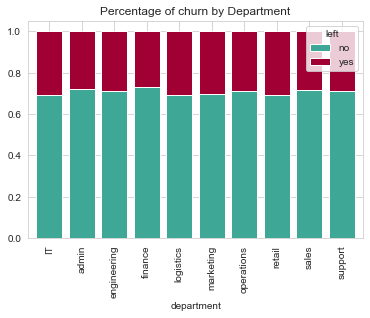

In [9]:
#percentage of churn by department
empchu.groupby('department')['left'].value_counts(normalize=True).unstack('left').plot.bar(stacked=True,label= True, color=['#3FA796','#A10035'],width= 0.8)
plt.title('Percentage of churn by Department')





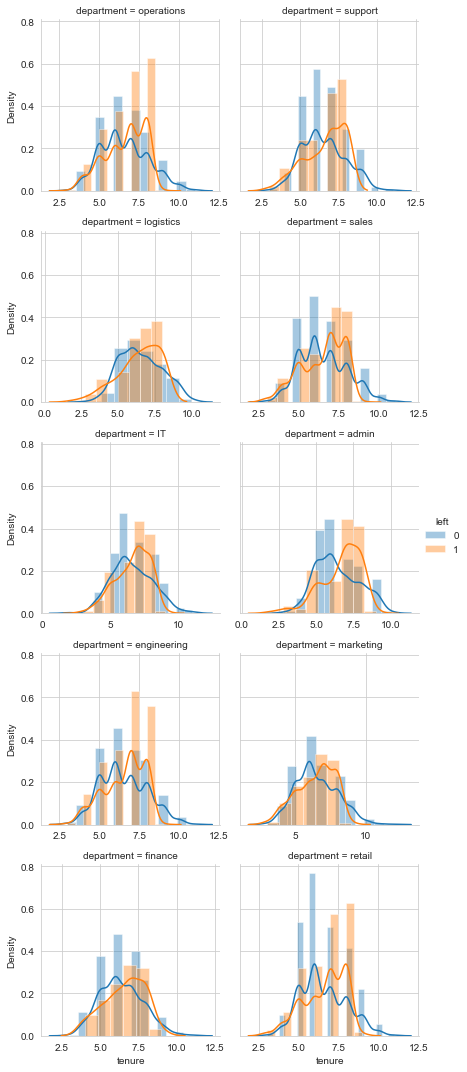

In [31]:
#the distribution of those who left in view of how long they lasted in the company
l=sns.FacetGrid(empchu, col="department", col_wrap=2, sharex= False, height=3, hue='left')
l.map(sns.distplot, "tenure")
l.add_legend()

##### more hours spent at work could have led to a higher stress level especially with poor rewards.
Incredible! 

Majority of those who left spent more than 8hrs a day at work on the average and yet poorly rewarded as compared to those who stayed. 
The issue of rewarding existing employees is gradually becoming a big talk in the human resource field. Companies prefer to make huge budgets to employ than maximizing their existing workers using measures like rewards.

This insight is also influenced by employees who have worked for more than 6 years (correlation between avg_hrs_day and tenure is 0.98). Could this be the case of over qualification which also leads to boredom or career limitation? 

To even drive this insight on a more solid ground, the review shows that employees are really productive beyond average while the employees are not impressed with what they get in return that should have had an effect on their satisfaction.

<AxesSubplot:xlabel='avg_hrs_day', ylabel='Density'>

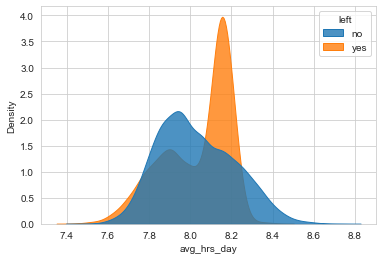

In [11]:
#empchu['avg_hrs_day']= empchu['avg_hrs_month']/23
time_dens= sns.kdeplot(data=empchu, x="avg_hrs_day", hue="left",alpha=0.8,fill=True,common_norm=False)
time_dens



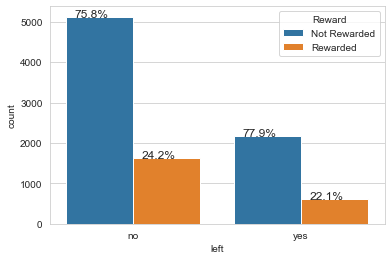

In [12]:
#could churning be attributed to rewards :Promotion and /or Bonus?
#empchu['Reward']= np.where((empchu['promoted']==1) | (empchu['bonus']==1),"Rewarded","Not Rewarded")
def bar_percent(ax, feature, Number_of_categories, hue_categories): 
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
r=sns.countplot(x='left',data=empchu,hue='Reward')
bar_percent(r,empchu.left,2,2)

**satisfaction** -the company from the employees eyes, **review** - the employee's performance from the company's eyes


<AxesSubplot:xlabel='review', ylabel='Density'>

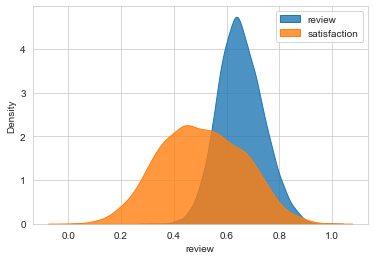

In [13]:
#review vs satisfaction
sat_rev= sns.kdeplot(data=empchu, x="review", alpha=0.8,fill=True,common_norm=False)
sns.kdeplot(data=empchu, x="satisfaction", alpha=0.8,fill=True,common_norm=False)
labels= ["review", "satisfaction"]
plt.legend(labels)
sat_rev


In addition, it is very visible that as people achieved higher reviews(which show great performance) they are less satisfied and this could be a result of burnout for almost nothing in reward. In reality this can be a very disturbing situation and enough to quit a job.

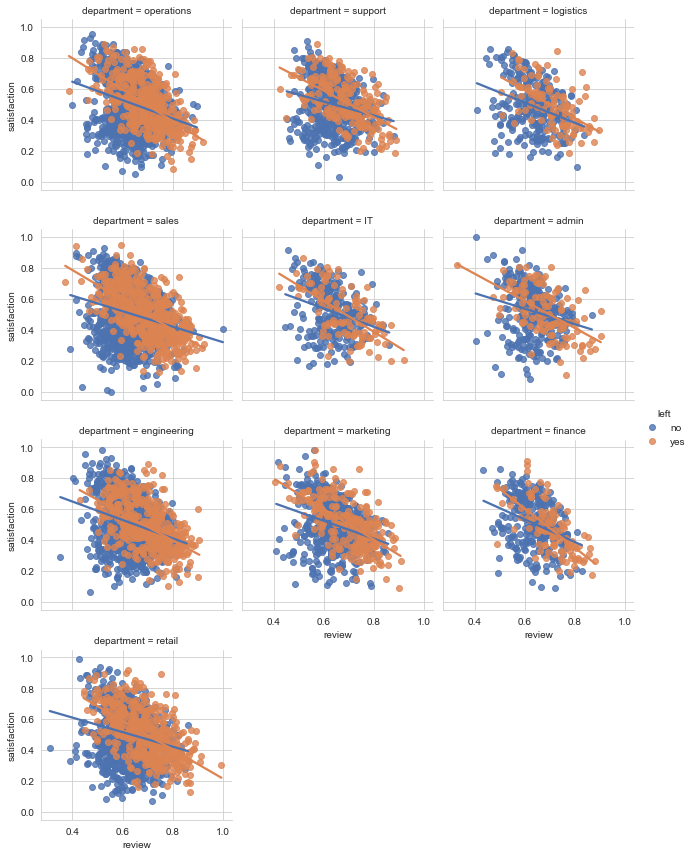

In [14]:
# review and satisfaction breakdown by departments and churn
sat_rev= sns.lmplot(x='review',y='satisfaction',data=empchu, hue="left", col='department',col_wrap=3,palette="deep",size=3, ci=None)
sat_rev

##### I am giving my best but It is not raining rewards
In our first graph, employee's churn at the 6th year is the lowest and also presents the churn in two groups. 
In addition, these two groups might be leaving for two separate reasons that are being explained by satisfaction,time and review.

First group- Served 7 years and above,more hours, highly satisfied, low review resulting to less than 2% promotion

Second group- Served 2-6years,smaller hours(partly affected by how long they have been in the company), low satisfaction, high review yet low promotion.

The traits of the first group suggest employees left because they had no room for improvement or promotion. Although satisfied, they must have percieved their irrelevance/ low input to the company. So they chose to move on rather than stay stagnant. We would have considered age factor (if that data was available) to suggest voluntary retirement or churcn as a result of age.

The second group churn may be due to solely poor reward. The company motivation is very low, 2 % promotion for people who work on the average 7 hours can considerd very poor.

Simply put, training(investing in exististing employees) and rewards should be taken seriously to reduce churn.


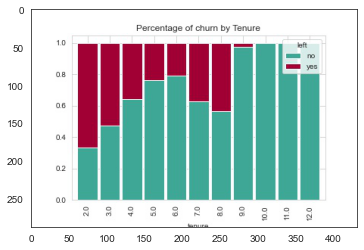

In [15]:
from matplotlib import image
sns.set_style("white")

img = image.imread("percentage of churn by tenure.jpeg")

#print( type(img) )
#print( img.shape )
plt.imshow(img)


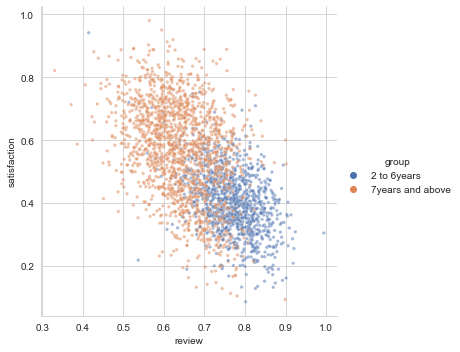

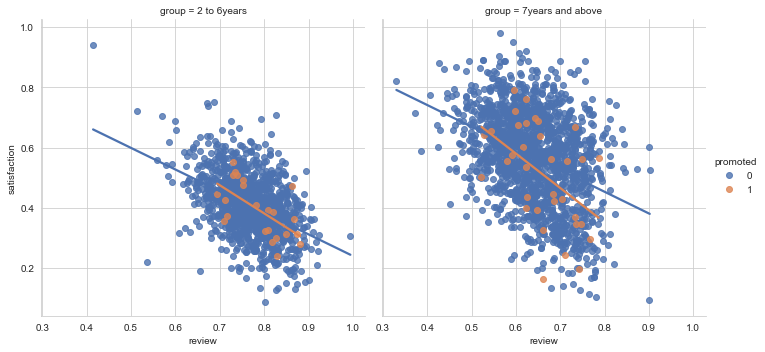

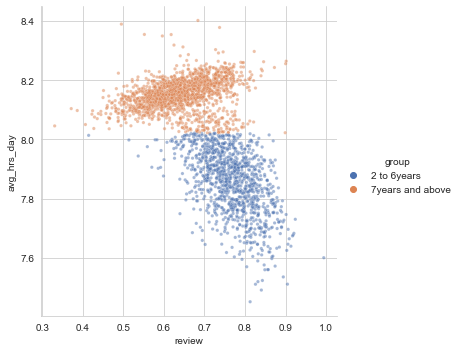

In [16]:
#form two groups 
sns.set_style("whitegrid")
left_yes['group']= np.where(left_yes['tenure']>= 7, '7years and above','2 to 6years')
sns.relplot(x='review',y='satisfaction',data=left_yes, hue="group",palette="deep",ci=None,s=11,alpha=0.5)
sns.lmplot(x='review',y='satisfaction',data=left_yes, hue="promoted",col= 'group',size=5,palette="deep",ci=None,)
sns.relplot(x='review',y='avg_hrs_day',data=left_yes, hue="group",palette="deep",ci=None,s=11,alpha=0.5)
plt.show()


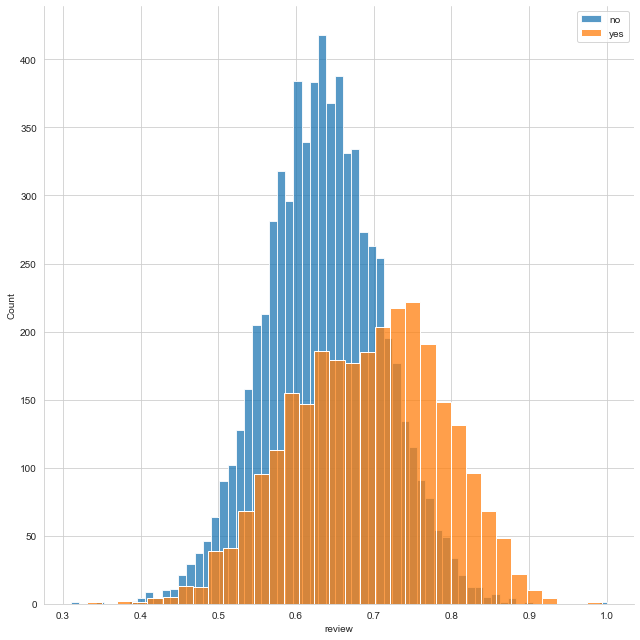

In [17]:
#review 
rev_rew=sns.FacetGrid(data=empchu,hue='left',size= 9)
rev_rew.map(sns.histplot, 'review')

plt.legend()

<AxesSubplot:xlabel='tenure', ylabel='count'>

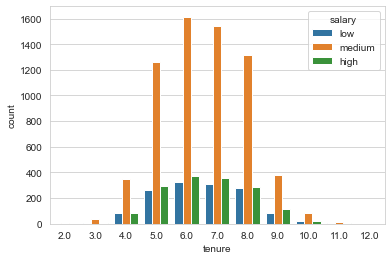

In [18]:
#empchu['Reward_num']= np.where((empchu['promoted']==1) | (empchu['bonus']==1),1,0)
sns.countplot(x='tenure',hue='salary', data=empchu,)

#### Salaries are not evenly distributed accross departments

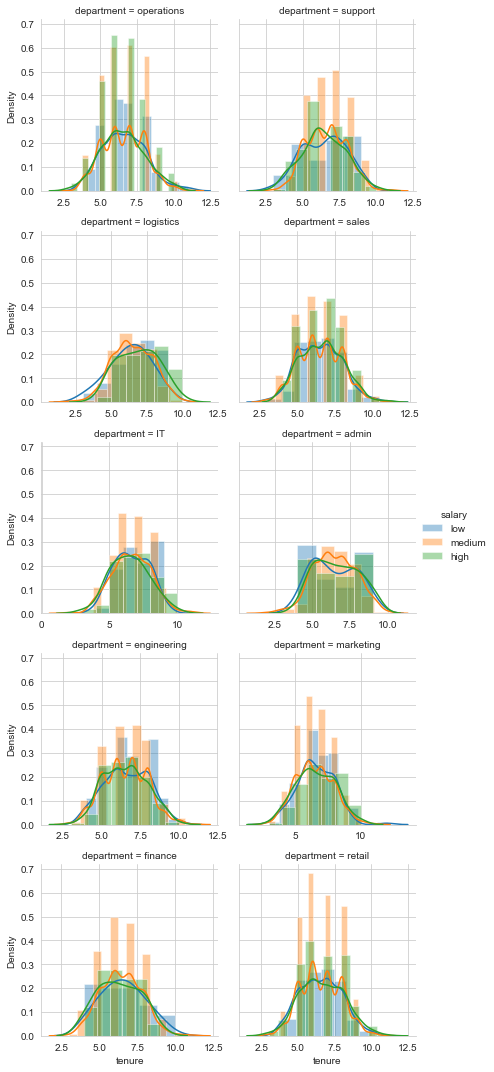

In [32]:
#sns.countplot(y='salary',data=empchu, hue='department')
s=sns.FacetGrid(empchu, col="department", col_wrap=2, sharex= False, height=3, hue='salary',palette='tab10')
s.map(sns.distplot, "tenure")
s.add_legend()



## There are still some staff who will leave- Classification task
This presents a classification task. The major features we will be using to predict these model is the variables that really has shown effect on the attrition. It should consist of **tenure, satisfaction, review, Reward_num, avg_hrs_day** and the label will be **left**.

Let's train this data to predict employees who are likely to live or stay. After, we will run this new model on the data containing those who are still working to predict how many more employees are likely to leave. 

Our model is 83% accurate resulting into 93 employees likely to still leave.

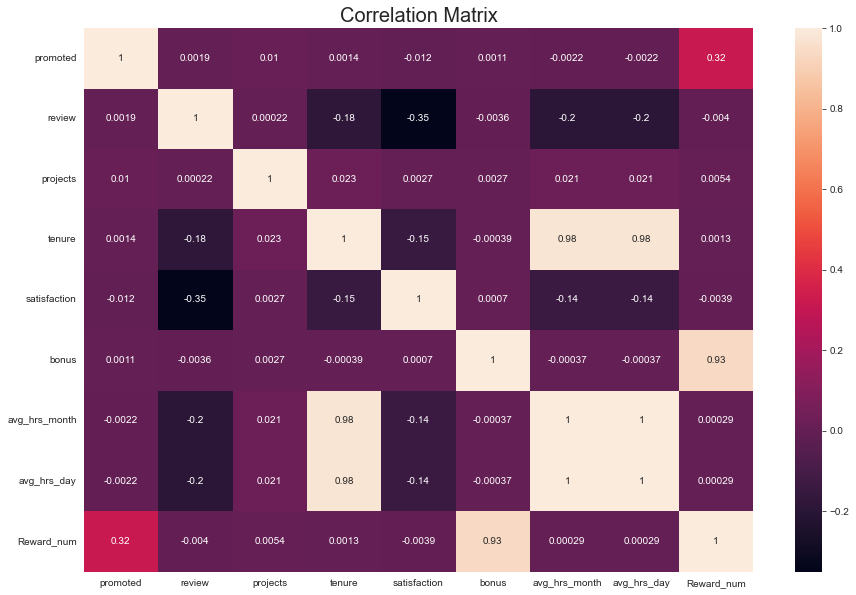

In [20]:
#correlation matrix to help us with what features to use.
plt.figure(figsize=(15, 10))
sns.heatmap(empchu.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [21]:
#empchu.left.map(dict(yes=1, no=0))
empchu['left'] = empchu['left'].map({'yes': 1, 'no': 0})

print(empchu.head())

   department  promoted    review  projects  salary  tenure  satisfaction  \
0  operations         0  0.577569         3     low     5.0      0.626759   
1  operations         0  0.751900         3  medium     6.0      0.443679   
2     support         0  0.722548         3  medium     6.0      0.446823   
3   logistics         0  0.675158         4    high     8.0      0.440139   
4       sales         0  0.676203         3    high     5.0      0.577607   

   bonus  avg_hrs_month  left  avg_hrs_day        Reward  Reward_num  
0      0     180.866070     0     7.863742  Not Rewarded           0  
1      0     182.708149     0     7.943833  Not Rewarded           0  
2      0     184.416084     0     8.018091  Not Rewarded           0  
3      0     188.707545     0     8.204676  Not Rewarded           0  
4      1     179.821083     0     7.818308      Rewarded           1  


In [22]:
# 1. Separate your data into predictor variables (X) and target variable (y)
X = empchu.drop(['department','promoted','projects','salary','bonus','Reward','left','avg_hrs_day'],axis =1)
y = empchu['left']

print('X')
print(X.head())
print()
print('y')
print(y.head())

X
     review  tenure  satisfaction  avg_hrs_month  Reward_num
0  0.577569     5.0      0.626759     180.866070           0
1  0.751900     6.0      0.443679     182.708149           0
2  0.722548     6.0      0.446823     184.416084           0
3  0.675158     8.0      0.440139     188.707545           0
4  0.676203     5.0      0.577607     179.821083           1

y
0    0
1    0
2    0
3    0
4    0
Name: left, dtype: int64


In [23]:
# Splitting the dataset into train dataset and test dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.25,random_state = 60)

In [24]:
# KNN
model = KNeighborsClassifier(n_neighbors=2, weights='uniform')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print('KNN model score is %0.4f' %score)
#y_pred=model.predict(X_test)-tested on X_test from splitted data 
#y_pred

KNN model score is 0.8335


In [25]:
#I tried out decision tree algorithm to see which works best

#from sklearn.tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score
#from sklearn. metrics import confusion_matrix
#emp_entropy=DecisionTreeClassifier(criterion= "entropy", random_state= 100, max_depth= 3,min_samples_leaf= 2)
#emp_entropy.fit(X_train, y_train)

#y_pred=emp_entropy.predict(X_test)
#y_pred.dtype
#print(("Accuracy is"), accuracy_score(y_test,y_pred)*100)

In [26]:
#predicting employees likely to leave-same dataset excluding those who left
empchu2 = pd.read_csv('employee_churn_data.csv')
empchu2['avg_hrs_day']= empchu2['avg_hrs_month']/23
empchu2['Reward']= np.where((empchu2['promoted']==1) | (empchu2['bonus']==1),"Rewarded","Not Rewarded")
empchu2['Reward_num']= np.where((empchu2['promoted']==1) | (empchu2['bonus']==1),1,0)
empchu2['left'] = empchu2['left'].map({'yes': 1, 'no': 0})



In [27]:
#selecting only those who are still work in order to determine those likly to leave
left_no= empchu2[empchu2['left']==0]
left_no
#the dataset we are trying our model on
X2=left_no.iloc[:, [2,5,6,8,12]]
X2 #~test features
y2=left_no.iloc[:, [9]]
y2 #~test target
left_no['y2']=y_pred=model.predict(X2)
left_no.y2.unique()
print(accuracy_score(y2, y_pred))#~accuracy metric

0.9862344582593251


In [28]:
#tested on the entire empchu dataset
#X1=empchu2.iloc[:, [2,5,6,8,12]]
#X1 #~test features
#y1=empchu2.iloc[:, [9]]
#y1
#empchu2['y2']=y_pred1=model.predict(X1)
#empchu2.y2.unique()
#print(accuracy_score(y1, y_pred1))#~accuracy metric

In [29]:
#out of the number of 6756 staff that are still working,89 are likely to leave 
pred_left_no= left_no[left_no['y2']==0]
pred_left_yes= left_no[left_no['y2']==1]
print("Staff likely to leave are ",pred_left_yes.y2.count(), 'in number and those likely to stay are', pred_left_no.y2.count())

Staff likely to leave are  93 in number and those likely to stay are 6663


In [30]:
#tested on the entire empchu dataset
#pred_left_no1= empchu2[empchu2['y2']==0]
#pred_left_yes1= empchu2[empchu2['y2']==1]
#print("Staff likely to leave are ",pred_left_yes1.y2.count(), 'in number and those likely to stay are', pred_left_no1.y2.count())

### Reference
- dataset-https://app.datacamp.com/learn/competitions/reducing-employee-turnover


### Thank you.

### - Esther Reginald Yeboah 